#### **Problem Statement**

XYZ Company 2020-2024 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimize pricing, promotions and market expansions for sustainable growth and reduced concentration risk.

In [1]:
# pip install pandas matplotlib seaborn scikit-learn jupyterlab openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
# sns.set_style('whitegrid')
# plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
sheet = pd.read_excel('D:\Prep\Projects\Sales-Analysis\Regional Sales Dataset.xlsx', sheet_name=None)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\abhir\AppData\Local\Temp\ipykernel_26496\22839004.py:1: SyntaxWarning: invalid escape sequence '\P'
  sheet = pd.read_excel('D:\Prep\Projects\Sales-Analysis\Regional Sales Dataset.xlsx', sheet_name=None)


In [4]:
sheet

{'Sales Orders':         OrderNumber            OrderDate  Customer Name Index      Channel  \
 0       SO - 000225  2020-01-01 00:00:00                  126    Wholesale   
 1      SO - 0003378  2020-01-01 00:00:00                   96  Distributor   
 2      SO - 0005126  2020-01-01 00:00:00                    8    Wholesale   
 3      SO - 0005614  2020-01-01 00:00:00                   42       Export   
 4      SO - 0005781  2020-01-01 00:00:00                   73    Wholesale   
 ...             ...                  ...                  ...          ...   
 64099  SO - 0007573  2024-02-28 00:00:00                   74    Wholesale   
 64100  SO - 0007706  2024-02-28 00:00:00                   51       Export   
 64101  SO - 0007718  2024-02-28 00:00:00                  136  Distributor   
 64102  SO - 0008084  2024-02-28 00:00:00                  158  Distributor   
 64103  SO - 0008654  2024-02-28 00:00:00                   22  Distributor   
 
       Currency Code Warehouse Cod

In [5]:
df_sales = sheet['Sales Orders']
df_customers = sheet['Customers']
df_products = sheet['Products']
df_regions = sheet['Regions']
df_state_reg = sheet['State Regions']
df_budgets = sheet['2024 Budgets']

In [6]:
print("df_sales shape: ", df_sales.shape)
print("df_customers shape: ", df_customers.shape)
print("df_products shape: ", df_products.shape)
print("df_regions shape: ", df_regions.shape)
print("df_state_reg shape: ", df_state_reg.shape)
print("df_budgets shape: ", df_budgets.shape)

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [7]:
df_sales.head(10)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270
5,SO - 0010394,2020-01-01 00:00:00,138,Export,USD,NXH382,626,23,11,5219.3,57412.3,4332.019
6,SO - 0008865,2020-01-01 00:00:00,53,Wholesale,USD,GUT930,540,1,7,2874.3,20120.1,1667.094
7,SO - 0009909,2020-01-01 00:00:00,45,Wholesale,USD,AXW291,156,25,10,1045.2,10452.0,679.380
8,SO - 0001912,2020-01-01 00:00:00,85,Wholesale,USD,AXW291,934,13,5,3852.5,19262.5,2966.425
9,SO - 0002683,2020-01-01 00:00:00,125,Export,USD,AXW291,652,14,12,2914.5,34974.0,1311.525


In [8]:
df_customers.head(10)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd
5,6,Family Corp
6,7,Skidoo Company
7,8,Amerisourc Corp
8,9,Walgreen Corp
9,10,Unit Ltd


In [9]:
df_products.head(10)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5
5,6,Product 6
6,7,Product 7
7,8,Product 8
8,9,Product 9
9,10,Product 10


In [10]:
df_regions.head(10)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago
5,6,Huntsville,Limestone County/Madison County,AL,Alabama,City,34.69901,-86.67298,256,190582,78554,48775,552604579,3452021,America/Chicago
6,7,Mobile,Mobile County,AL,Alabama,City,30.69436,-88.04305,251,194288,76170,38776,361044263,105325210,America/Chicago
7,8,Montgomery,Montgomery County,AL,Alabama,City,32.36681,-86.29997,334,200602,79866,42927,413985435,4411954,America/Chicago
8,9,Tuscaloosa,Tuscaloosa County,AL,Alabama,City,33.20984,-87.56917,205,98332,32468,39351,159585773,26058465,America/Chicago
9,10,Conway,Faulkner County,AR,Arkansas,City,35.08870,-92.44210,501,64980,23439,47504,119284002,648518,America/Chicago


In [11]:
df_state_reg.head(10)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West
5,CO,Colorado,West
6,CT,Connecticut,Northeast
7,DC,District of Columbia,South
8,DE,Delaware,South
9,FL,Florida,South


In [12]:
df_budgets.head(10)

,Product Name,2024 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542
5,Product 6,1672229.416
6,Product 7,889737.555
7,Product 8,1085037.329
8,Product 9,710415.405
9,Product 10,864331.624


In [13]:
# Fixing Column issues in df state reg dataframe
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(10)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West
5,CT,Connecticut,Northeast
6,DC,District of Columbia,South
7,DE,Delaware,South
8,FL,Florida,South
9,GA,Georgia,South


In [14]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [15]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [16]:
df_budgets.isnull().sum()

Product Name    0
2024 Budgets    0
dtype: int64

In [17]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [18]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [19]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

#### Data Cleaning and Wrangling.

In [20]:
# Merge with Customers

df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [21]:
df.head(10)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group
5,SO - 0010394,2020-01-01 00:00:00,138,Export,USD,NXH382,626,23,11,5219.3,57412.3,4332.019,138,Zoovu Corp
6,SO - 0008865,2020-01-01 00:00:00,53,Wholesale,USD,GUT930,540,1,7,2874.3,20120.1,1667.094,53,Kare Corp
7,SO - 0009909,2020-01-01 00:00:00,45,Wholesale,USD,AXW291,156,25,10,1045.2,10452.0,679.380,45,State Ltd
8,SO - 0001912,2020-01-01 00:00:00,85,Wholesale,USD,AXW291,934,13,5,3852.5,19262.5,2966.425,85,Lazzy Group
9,SO - 0002683,2020-01-01 00:00:00,125,Export,USD,AXW291,652,14,12,2914.5,34974.0,1311.525,125,Zooveo Company


In [22]:
# Merge with Products

df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [23]:
df.head(10)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8
5,SO - 0010394,2020-01-01 00:00:00,138,Export,USD,NXH382,626,23,11,5219.3,57412.3,4332.019,138,Zoovu Corp,23,Product 23
6,SO - 0008865,2020-01-01 00:00:00,53,Wholesale,USD,GUT930,540,1,7,2874.3,20120.1,1667.094,53,Kare Corp,1,Product 1
7,SO - 0009909,2020-01-01 00:00:00,45,Wholesale,USD,AXW291,156,25,10,1045.2,10452.0,679.380,45,State Ltd,25,Product 25
8,SO - 0001912,2020-01-01 00:00:00,85,Wholesale,USD,AXW291,934,13,5,3852.5,19262.5,2966.425,85,Lazzy Group,13,Product 13
9,SO - 0002683,2020-01-01 00:00:00,125,Export,USD,AXW291,652,14,12,2914.5,34974.0,1311.525,125,Zooveo Company,14,Product 14


In [24]:
# Merge with Regions

df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [25]:
df.head(10)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York
5,SO - 0010394,2020-01-01 00:00:00,138,Export,USD,NXH382,626,23,11,5219.3,...,City,44.91330,-93.50329,952,51669,22676,78589,69730100,5587760,America/Chicago
6,SO - 0008865,2020-01-01 00:00:00,53,Wholesale,USD,GUT930,540,1,7,2874.3,...,Town,42.32385,-71.14200,857,59195,25324,95518,17508399,184972,America/New York
7,SO - 0009909,2020-01-01 00:00:00,45,Wholesale,USD,AXW291,156,25,10,1045.2,...,City,34.05529,-117.75228,909,153266,39378,49186,59446734,26188,America/Los Angeles
8,SO - 0001912,2020-01-01 00:00:00,85,Wholesale,USD,AXW291,934,13,5,3852.5,...,City,40.56217,-111.92966,385,66648,16748,94183,57533764,228038,America/Denver
9,SO - 0002683,2020-01-01 00:00:00,125,Export,USD,AXW291,652,14,12,2914.5,...,City,36.07613,-79.46830,336,52472,21562,36140,75533002,3947235,America/New York


In [26]:
# Merge with State Regions

df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [27]:
df.head(10)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast
5,SO - 0010394,2020-01-01 00:00:00,138,Export,USD,NXH382,626,23,11,5219.3,...,-93.50329,952,51669,22676,78589,69730100,5587760,America/Chicago,MN,Midwest
6,SO - 0008865,2020-01-01 00:00:00,53,Wholesale,USD,GUT930,540,1,7,2874.3,...,-71.14200,857,59195,25324,95518,17508399,184972,America/New York,MA,Northeast
7,SO - 0009909,2020-01-01 00:00:00,45,Wholesale,USD,AXW291,156,25,10,1045.2,...,-117.75228,909,153266,39378,49186,59446734,26188,America/Los Angeles,CA,West
8,SO - 0001912,2020-01-01 00:00:00,85,Wholesale,USD,AXW291,934,13,5,3852.5,...,-111.92966,385,66648,16748,94183,57533764,228038,America/Denver,UT,West
9,SO - 0002683,2020-01-01 00:00:00,125,Export,USD,AXW291,652,14,12,2914.5,...,-79.46830,336,52472,21562,36140,75533002,3947235,America/New York,NC,South


In [28]:
# Merge with Budgets

df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [29]:
# Clean up Redundant/ Repetitive Columns Like Customer Index, Index, id, State Code

cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns=cols_to_drop, errors='ignore')
df.head(10)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2024 Budgets
0,SO - 000225,2020-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2020-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2020-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2020-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2020-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329
5,SO - 0010394,2020-01-01 00:00:00,138,Export,USD,NXH382,626,23,11,5219.3,...,-93.50329,952,51669,22676,78589,69730100,5587760,America/Chicago,Midwest,1135815.758
6,SO - 0008865,2020-01-01 00:00:00,53,Wholesale,USD,GUT930,540,1,7,2874.3,...,-71.14200,857,59195,25324,95518,17508399,184972,America/New York,Northeast,3016489.209
7,SO - 0009909,2020-01-01 00:00:00,45,Wholesale,USD,AXW291,156,25,10,1045.2,...,-117.75228,909,153266,39378,49186,59446734,26188,America/Los Angeles,West,5342315.484
8,SO - 0001912,2020-01-01 00:00:00,85,Wholesale,USD,AXW291,934,13,5,3852.5,...,-111.92966,385,66648,16748,94183,57533764,228038,America/Denver,West,3720639.645
9,SO - 0002683,2020-01-01 00:00:00,125,Export,USD,AXW291,652,14,12,2914.5,...,-79.46830,336,52472,21562,36140,75533002,3947235,America/New York,South,4028698.409


In [30]:
# Convert all the columns to lowercase for easier access and consistency.
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2024 budgets'], dtype=object)

In [31]:
# Keep the important columns and delete the columns that we don't need.

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2024 budgets'
]

In [32]:
df = df[cols_to_keep]
df.head(10)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2024 budgets
0,SO - 000225,2020-01-01 00:00:00,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2020-01-01 00:00:00,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2020-01-01 00:00:00,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2020-01-01 00:00:00,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2020-01-01 00:00:00,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329
5,SO - 0010394,2020-01-01 00:00:00,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,Hennepin County,Minnesota,Midwest,44.91330,-93.50329,1135815.758
6,SO - 0008865,2020-01-01 00:00:00,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,Norfolk County,Massachusetts,Northeast,42.32385,-71.14200,3016489.209
7,SO - 0009909,2020-01-01 00:00:00,State Ltd,Wholesale,Product 25,10,1045.2,10452.0,679.380,CA,Los Angeles County,California,West,34.05529,-117.75228,5342315.484
8,SO - 0001912,2020-01-01 00:00:00,Lazzy Group,Wholesale,Product 13,5,3852.5,19262.5,2966.425,UT,Salt Lake County,Utah,West,40.56217,-111.92966,3720639.645
9,SO - 0002683,2020-01-01 00:00:00,Zooveo Company,Export,Product 14,12,2914.5,34974.0,1311.525,NC,Alamance County/Guilford County,North Carolina,South,36.07613,-79.46830,4028698.409


In [33]:
# Rename columns for better readability
df = df.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total unit cost': 'cost',
    'state_code': 'state',
    'state': 'state_name',
    'latitude': 'lat',
    'longitude': 'lon',
    '2024 budgets': 'budget'
})

df.head(10)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2020-01-01 00:00:00,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2020-01-01 00:00:00,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2020-01-01 00:00:00,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2020-01-01 00:00:00,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2020-01-01 00:00:00,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329
5,SO - 0010394,2020-01-01 00:00:00,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,Hennepin County,Minnesota,Midwest,44.91330,-93.50329,1135815.758
6,SO - 0008865,2020-01-01 00:00:00,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,Norfolk County,Massachusetts,Northeast,42.32385,-71.14200,3016489.209
7,SO - 0009909,2020-01-01 00:00:00,State Ltd,Wholesale,Product 25,10,1045.2,10452.0,679.380,CA,Los Angeles County,California,West,34.05529,-117.75228,5342315.484
8,SO - 0001912,2020-01-01 00:00:00,Lazzy Group,Wholesale,Product 13,5,3852.5,19262.5,2966.425,UT,Salt Lake County,Utah,West,40.56217,-111.92966,3720639.645
9,SO - 0002683,2020-01-01 00:00:00,Zooveo Company,Export,Product 14,12,2914.5,34974.0,1311.525,NC,Alamance County/Guilford County,North Carolina,South,36.07613,-79.46830,4028698.409


In [34]:
# Ensure order_date is a datetime dtype so the .dt accessor can be used safely.
# Invalid/parsing-failed values will become NaT.
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Blank out budgets for all non-2024 orders (NaT will be treated as not 2024).
df.loc[df['order_date'].dt.year != 2024, 'budget'] = pd.NA

# Line total is revenue.
df[['order_date', 'product_name', 'revenue', 'budget']].head(10)

,order_date,product_name,revenue,budget
0,2020-01-01,Product 27,14994.6,NaN
1,2020-01-01,Product 20,25868.7,NaN
2,2020-01-01,Product 26,5869.2,NaN
3,2020-01-01,Product 7,16368.1,NaN
4,2020-01-01,Product 8,18331.2,NaN
5,2020-01-01,Product 23,57412.3,NaN
6,2020-01-01,Product 1,20120.1,NaN
7,2020-01-01,Product 25,10452.0,NaN
8,2020-01-01,Product 13,19262.5,NaN
9,2020-01-01,Product 14,34974.0,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64068 non-null  datetime64[ns]
 2   customer_name   64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state           64104 non-null  object        
 10  county          64104 non-null  object        
 11  state_name      64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [36]:
# Filter the dataset to include only records from year 2024.
df_2024 = df[df['order_date'].dt.year == 2024]

In [37]:
df_2024.isnull().sum()

order_number      0
order_date        0
customer_name     0
channel           0
product_name      0
order_quantity    0
unit_price        0
revenue           0
cost              0
state             0
county            0
state_name        0
region            0
lat               0
lon               0
budget            0
dtype: int64

In [38]:
df_2024.head(10)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
61626,SO - 0001442,2024-01-01,Skajo Ltd,Export,Product 13,7,5902.7,41318.9,3541.620,OR,Washington County,Oregon,West,45.49428,-122.86705,3720639.645
61627,SO - 0003288,2024-01-01,Tagfeed Ltd,Wholesale,Product 25,10,1045.2,10452.0,731.640,GA,Richmond County,Georgia,South,33.36149,-82.07500,5342315.484
61628,SO - 0003590,2024-01-01,WOCKHARDT Group,Distributor,Product 21,6,1092.1,6552.6,436.840,MD,Montgomery County,Maryland,South,39.08400,-77.15276,959899.218
61629,SO - 0005484,2024-01-01,Johnson Ltd,Distributor,Product 5,6,3926.2,23557.2,1845.314,CT,New Haven County,Connecticut,Northeast,41.39733,-72.92223,3925424.542
61630,SO - 0006720,2024-01-01,Amerisourc Corp,Distributor,Product 13,10,3959.7,39597.0,2732.193,IL,Will County/DuPage County,Illinois,Midwest,41.69112,-88.10157,3720639.645
61631,SO - 0008160,2024-01-01,Brightdog Corp,Wholesale,Product 8,5,2566.1,12830.5,1950.236,TX,Tarrant County/Denton County/Dallas County,Texas,South,32.93411,-97.07653,1085037.329
61632,SO - 0001664,2024-01-01,CARDINAL Group,Export,Product 25,7,2224.4,15570.8,1890.740,FL,Escambia County,Florida,South,30.42131,-87.21691,5342315.484
61633,SO - 0001683,2024-01-01,Geiss Company,Wholesale,Product 29,8,3926.2,31409.6,2630.554,CO,Jefferson County/Adams County,Colorado,West,39.83373,-105.15031,594471.570
61634,SO - 0003728,2024-01-01,Rooxo Company,Distributor,Product 13,6,5138.9,30833.4,3597.230,CA,San Diego County,California,West,33.03699,-117.29198,3720639.645
61635,SO - 0007431,2024-01-01,Browsetype Corp,Distributor,Product 22,9,911.2,8200.8,537.608,FL,Duval County,Florida,South,30.33218,-81.65565,663601.902


### Feature Engineering

In [39]:
df.head(10)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2020-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2020-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2020-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN
5,SO - 0010394,2020-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,Hennepin County,Minnesota,Midwest,44.91330,-93.50329,NaN
6,SO - 0008865,2020-01-01,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,Norfolk County,Massachusetts,Northeast,42.32385,-71.14200,NaN
7,SO - 0009909,2020-01-01,State Ltd,Wholesale,Product 25,10,1045.2,10452.0,679.380,CA,Los Angeles County,California,West,34.05529,-117.75228,NaN
8,SO - 0001912,2020-01-01,Lazzy Group,Wholesale,Product 13,5,3852.5,19262.5,2966.425,UT,Salt Lake County,Utah,West,40.56217,-111.92966,NaN
9,SO - 0002683,2020-01-01,Zooveo Company,Export,Product 14,12,2914.5,34974.0,1311.525,NC,Alamance County/Guilford County,North Carolina,South,36.07613,-79.46830,NaN


In [40]:
df['total_cost'] = df['order_quantity'] * df['cost']
df.head(10)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget,total_cost
0,SO - 000225,2020-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440
3,SO - 0005614,2020-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964
4,SO - 0005781,2020-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160
5,SO - 0010394,2020-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,Hennepin County,Minnesota,Midwest,44.91330,-93.50329,NaN,47652.209
6,SO - 0008865,2020-01-01,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,Norfolk County,Massachusetts,Northeast,42.32385,-71.14200,NaN,11669.658
7,SO - 0009909,2020-01-01,State Ltd,Wholesale,Product 25,10,1045.2,10452.0,679.380,CA,Los Angeles County,California,West,34.05529,-117.75228,NaN,6793.800
8,SO - 0001912,2020-01-01,Lazzy Group,Wholesale,Product 13,5,3852.5,19262.5,2966.425,UT,Salt Lake County,Utah,West,40.56217,-111.92966,NaN,14832.125
9,SO - 0002683,2020-01-01,Zooveo Company,Export,Product 14,12,2914.5,34974.0,1311.525,NC,Alamance County/Guilford County,North Carolina,South,36.07613,-79.46830,NaN,15738.300


In [41]:
df['profit'] = df['revenue'] - df['total_cost']
df['profit'].head(10)

0     4048.542
1    11899.602
2     1760.760
3     9166.136
4     8249.040
5     9760.091
6     8450.442
7     3658.200
8     4430.375
9    19235.700
Name: profit, dtype: float64

In [42]:
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100
df.head(10)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2020-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2020-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2020-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0
5,SO - 0010394,2020-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,Hennepin County,Minnesota,Midwest,44.91330,-93.50329,NaN,47652.209,9760.091,17.0
6,SO - 0008865,2020-01-01,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,Norfolk County,Massachusetts,Northeast,42.32385,-71.14200,NaN,11669.658,8450.442,42.0
7,SO - 0009909,2020-01-01,State Ltd,Wholesale,Product 25,10,1045.2,10452.0,679.380,CA,Los Angeles County,California,West,34.05529,-117.75228,NaN,6793.800,3658.200,35.0
8,SO - 0001912,2020-01-01,Lazzy Group,Wholesale,Product 13,5,3852.5,19262.5,2966.425,UT,Salt Lake County,Utah,West,40.56217,-111.92966,NaN,14832.125,4430.375,23.0
9,SO - 0002683,2020-01-01,Zooveo Company,Export,Product 14,12,2914.5,34974.0,1311.525,NC,Alamance County/Guilford County,North Carolina,South,36.07613,-79.46830,NaN,15738.300,19235.700,55.0


### **EDA**

In [43]:
df['order_month'] = df['order_date'].dt.to_period('M')
df.head(10)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month
0,SO - 000225,2020-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2020-01
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2020-01
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2020-01
3,SO - 0005614,2020-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2020-01
4,SO - 0005781,2020-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2020-01
5,SO - 0010394,2020-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,Hennepin County,Minnesota,Midwest,44.91330,-93.50329,NaN,47652.209,9760.091,17.0,2020-01
6,SO - 0008865,2020-01-01,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,Norfolk County,Massachusetts,Northeast,42.32385,-71.14200,NaN,11669.658,8450.442,42.0,2020-01
7,SO - 0009909,2020-01-01,State Ltd,Wholesale,Product 25,10,1045.2,10452.0,679.380,CA,Los Angeles County,California,West,34.05529,-117.75228,NaN,6793.800,3658.200,35.0,2020-01
8,SO - 0001912,2020-01-01,Lazzy Group,Wholesale,Product 13,5,3852.5,19262.5,2966.425,UT,Salt Lake County,Utah,West,40.56217,-111.92966,NaN,14832.125,4430.375,23.0,2020-01
9,SO - 0002683,2020-01-01,Zooveo Company,Export,Product 14,12,2914.5,34974.0,1311.525,NC,Alamance County/Guilford County,North Carolina,South,36.07613,-79.46830,NaN,15738.300,19235.700,55.0,2020-01


In [44]:
monthly_sales = df.groupby('order_month')['revenue'].sum()
monthly_sales

order_month
2020-01    25020272.3
2020-02    23882719.5
2020-03    23709035.4
2020-04    24853382.0
2020-05    25662165.8
2020-06    23818794.8
2020-07    23491988.9
2020-08    25408229.1
2020-09    25459497.5
2020-10    24259835.7
2020-11    26268221.0
2020-12    25686587.3
2021-01    25525914.6
2021-02    23027431.0
2021-03    24360945.4
2021-04    23744217.1
2021-05    24995904.4
2021-06    24528391.8
2021-07    24808203.9
2021-08    26155634.2
2021-09    24662586.1
2021-10    25466197.5
2021-11    25573136.2
2021-12    25562148.2
2022-01    24862829.0
2022-02    22496295.2
2022-03    26420512.0
2022-04    23179165.9
2022-05    25265324.8
2022-06    24804170.5
2022-07    24814997.7
2022-08    25082099.9
2022-09    24551560.4
2022-10    25896129.8
2022-11    25078997.8
2022-12    24976635.2
2023-01    24017201.9
2023-02    21241586.2
2023-03    26123159.3
2023-04    23447990.0
2023-05    26348721.5
2023-06    23761335.6
2023-07    24070011.3
2023-08    25301062.6
2023-09    24758657.

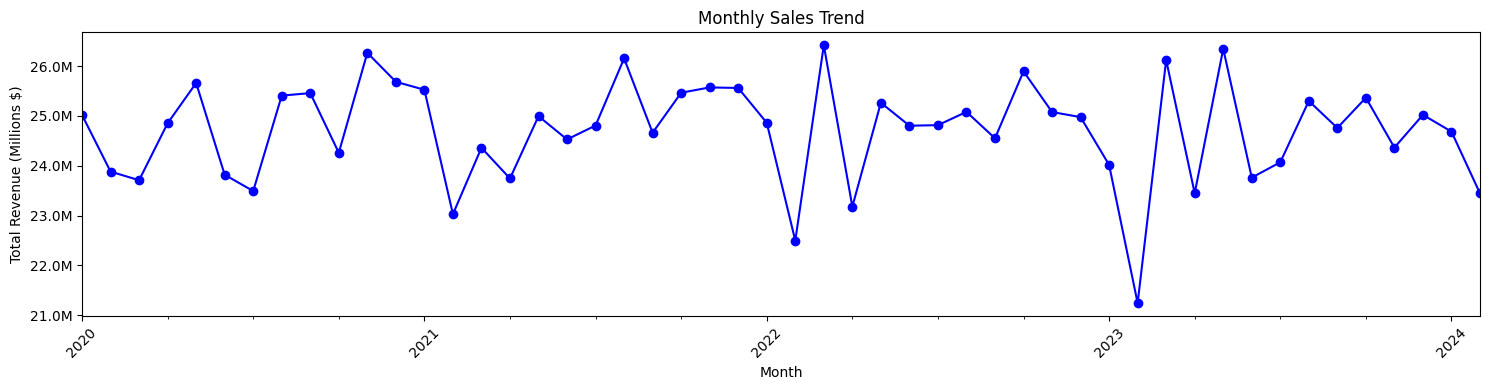

In [45]:
plt.figure(figsize=(15,4))
monthly_sales.plot(marker = 'o', color = 'blue')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions $)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\abhir\AppData\Local\Temp\ipykernel_26496\3785812669.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='month', y='revenue', data=monthly_trend, palette='Blues_d')


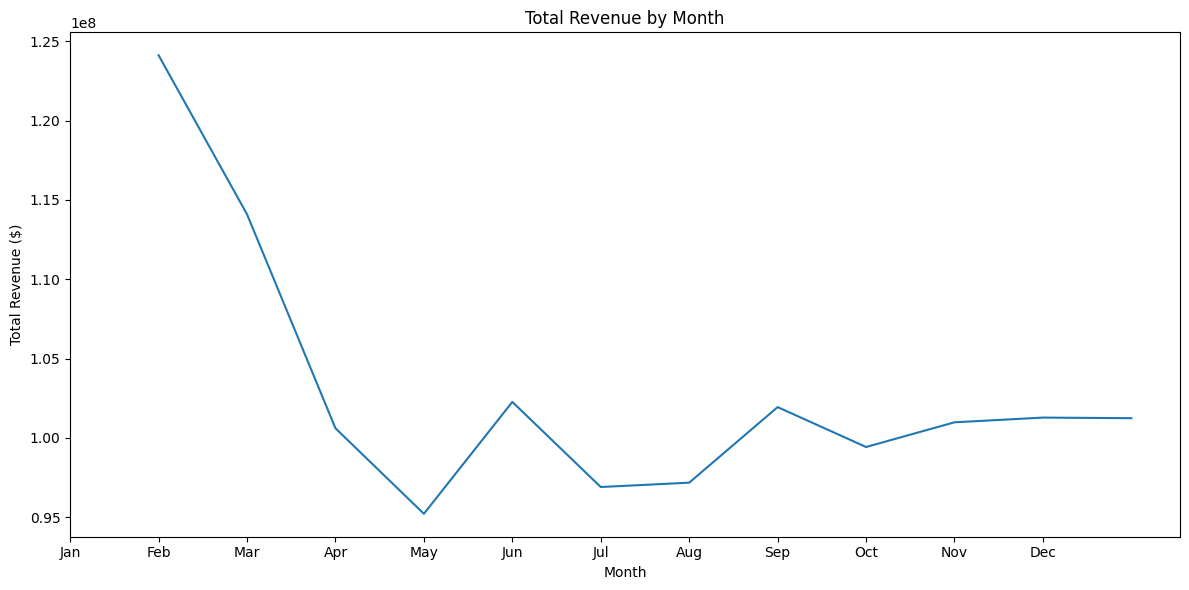

In [48]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month

monthly_trend = df.groupby('month')['revenue'].sum().reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=range(1,13), ordered=True)
monthly_trend = monthly_trend.sort_values('month')

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='revenue', data=monthly_trend, palette='Blues_d')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=np.arange(0,12), labels=month_order)
plt.tight_layout()
plt.show()

In [50]:
df['order_date'] = pd.to_datetime(df['order_date'])
df_new = df[~((df['order_date'].dt.year == 2024) & (df['order_date'].dt.month.isin([1,2])))]

C:\Users\abhir\AppData\Local\Temp\ipykernel_26496\4204818643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
C:\Users\abhir\AppData\Local\Temp\ipykernel_26496\4204818643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.month
C:\Users\abhir\AppData\Local\Temp\ipykernel_26496\4204818643.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='month', y='reve

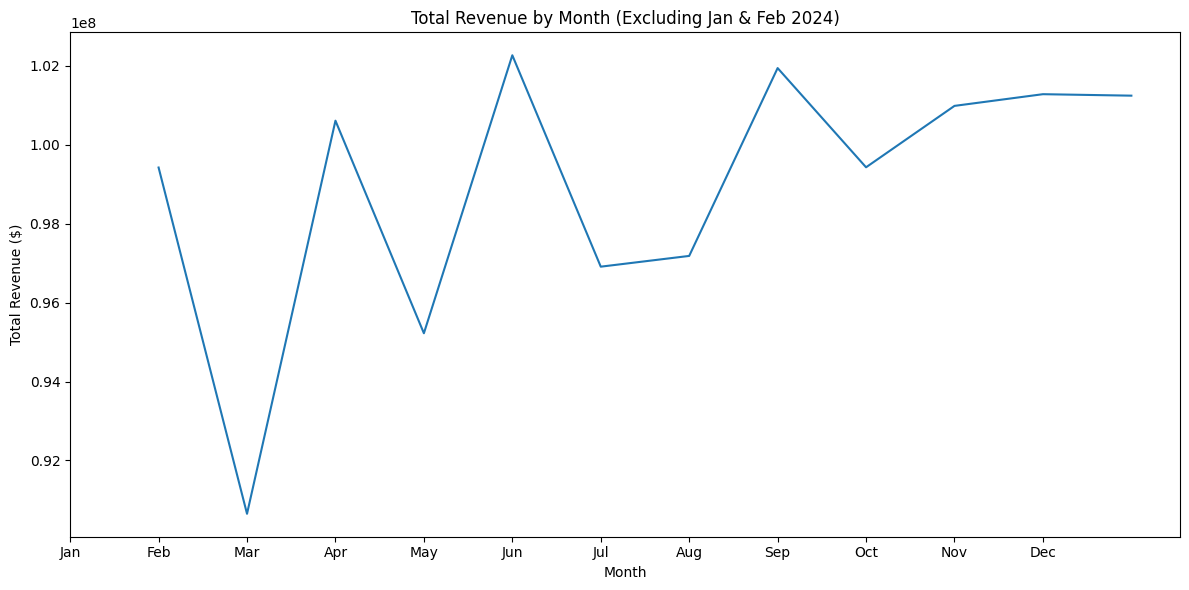

In [52]:
df_new['order_date'] = pd.to_datetime(df_new['order_date'])
df_new['month'] = df_new['order_date'].dt.month

monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=range(1,13), ordered=True)
monthly_trend = monthly_trend.sort_values('month')

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='revenue', data=monthly_trend, palette='Blues_d')
plt.title('Total Revenue by Month (Excluding Jan & Feb 2024)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=np.arange(0,12), labels=month_order)
plt.tight_layout()
plt.show()